In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the base directory path where the Excel files are located
directory_path = '../../data/revenue_results/'

# Define the start and end rows for each table, including the column range
data_locations = {
    '28 Days': {'start_row': 1, 'end_row': 6, 'column_range': 'A:K'},
    '14 Days': {'start_row': 8, 'end_row': 13, 'column_range': 'A:K'},
    '7 Days': {'start_row': 15, 'end_row': 20, 'column_range': 'A:K'},
    '3 Days': {'start_row': 22, 'end_row': 27, 'column_range': 'A:K'},
    '2 Days': {'start_row': 29, 'end_row': 34, 'column_range': 'A:K'},
    '1 Day': {'start_row': 36, 'end_row': 41, 'column_range': 'A:K'},
}

# Dictionary to hold the DataFrames for each file and table
all_dataframes = {}

# Iterate over each Excel file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.xlsx'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Dictionary to hold DataFrames for the current file
        file_dataframes = {}

        # Read each table into a separate DataFrame
        for table_name, info in data_locations.items():
            file_dataframes[table_name] = pd.read_excel(
                file_path,
                usecols=info['column_range'],
                skiprows=info['start_row']-1,  # -1 because pandas is 0-indexed
                nrows=info['end_row']-info['start_row']+1  # Calculate number of rows to read
            )
        
        # Store the DataFrames for the current file in the main dictionary
        all_dataframes[filename] = file_dataframes

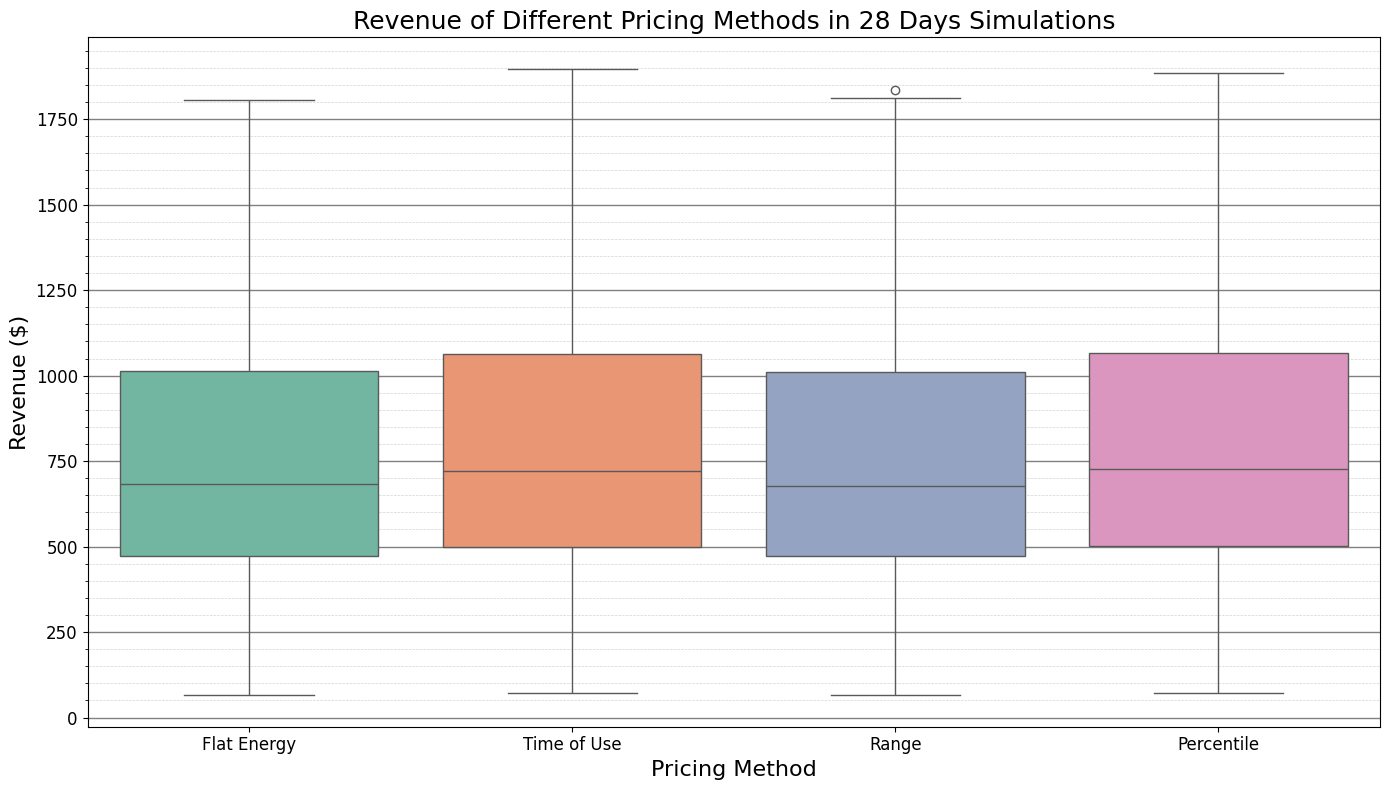

<Figure size 640x480 with 0 Axes>

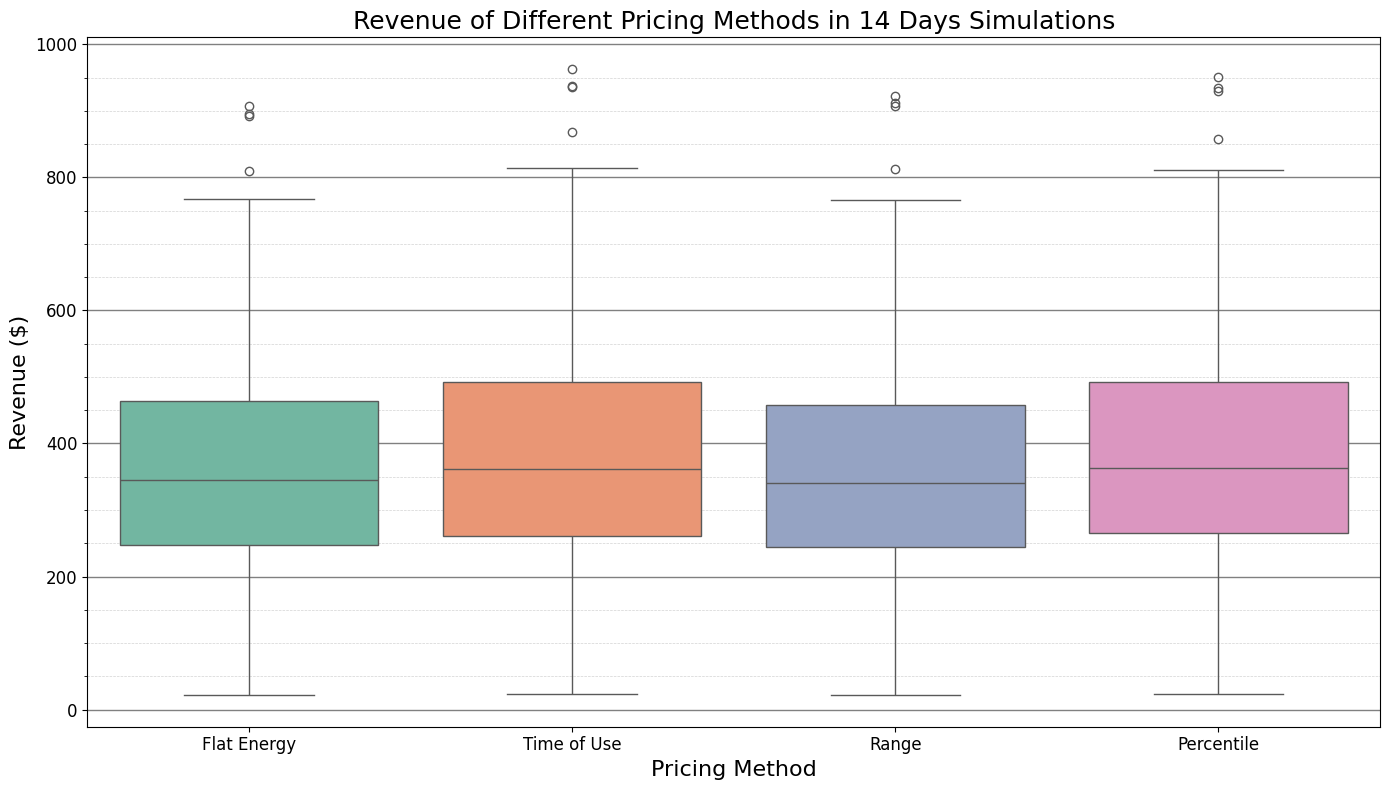

<Figure size 640x480 with 0 Axes>

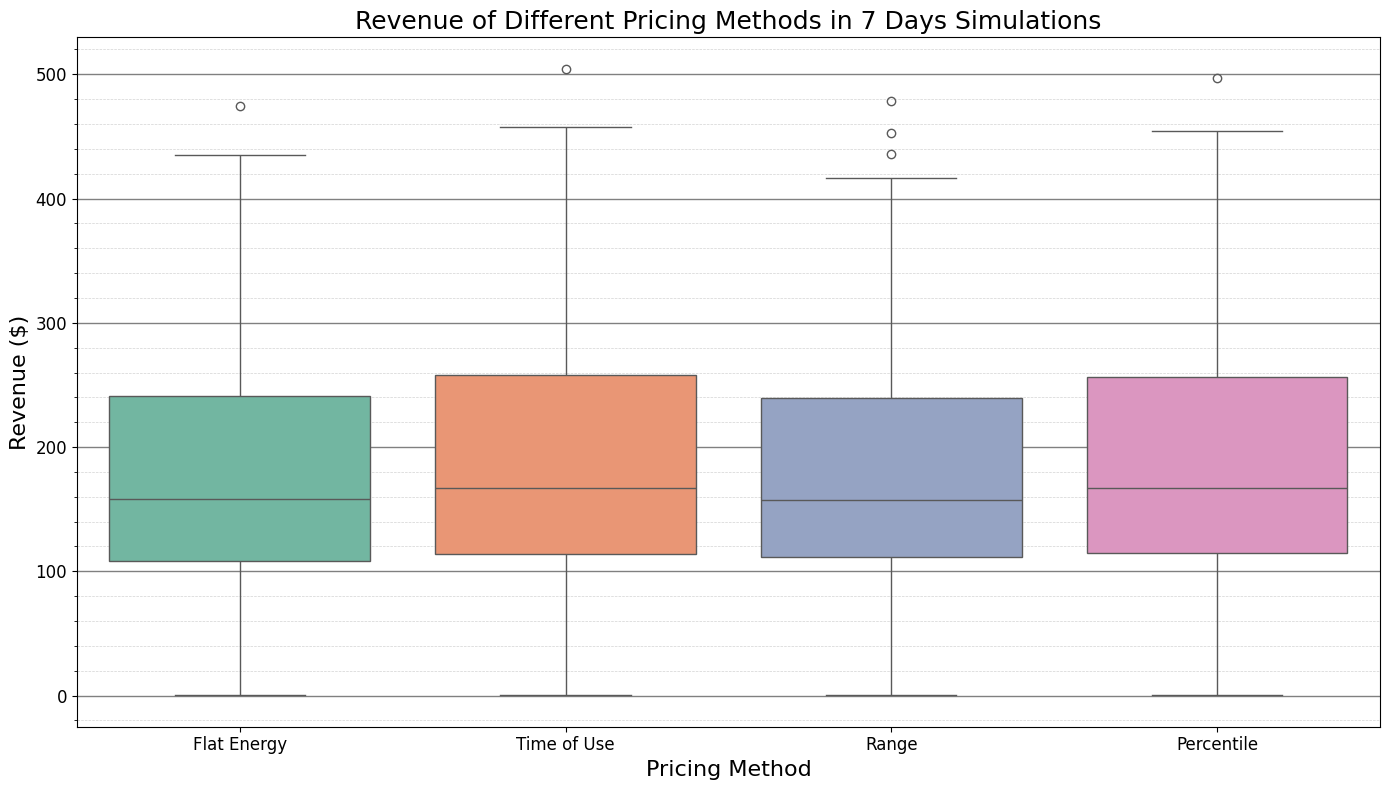

<Figure size 640x480 with 0 Axes>

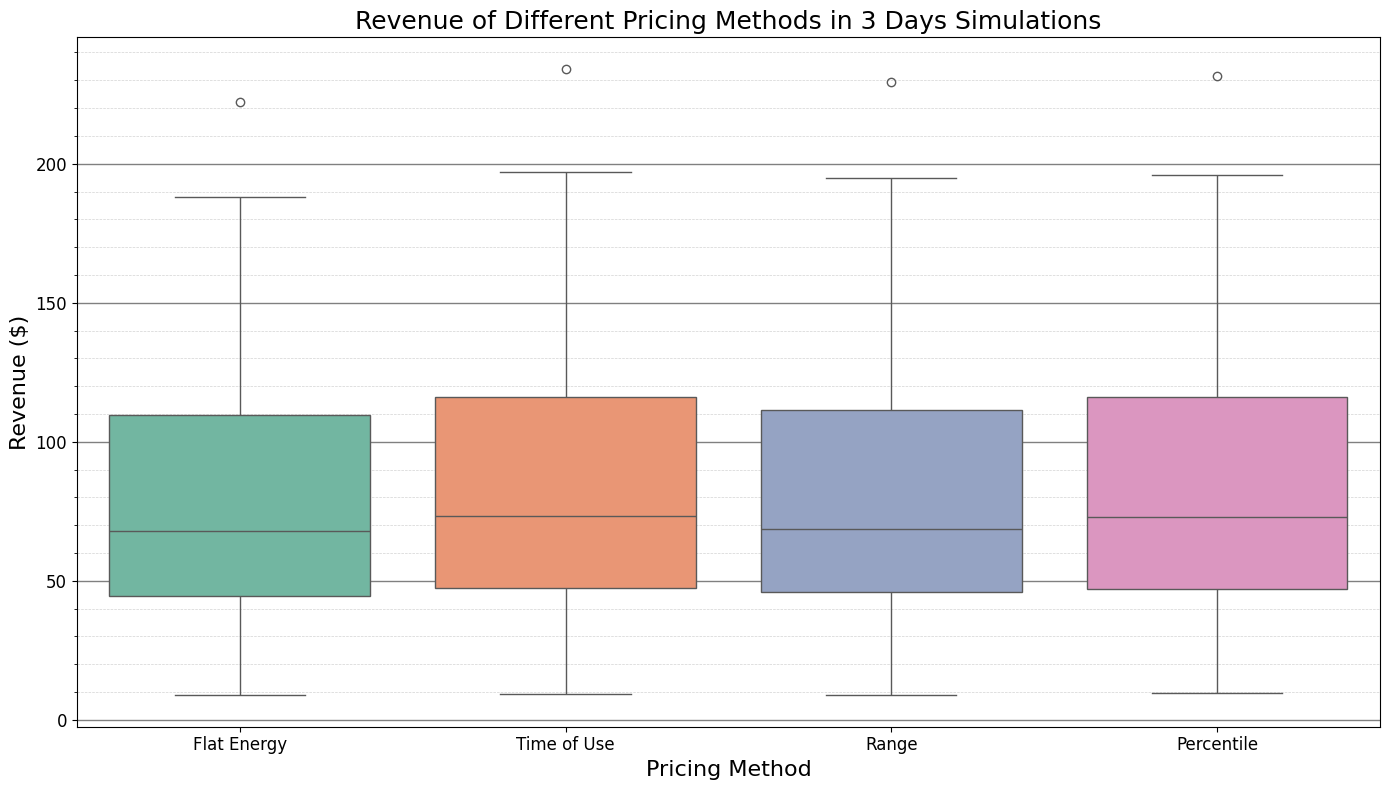

<Figure size 640x480 with 0 Axes>

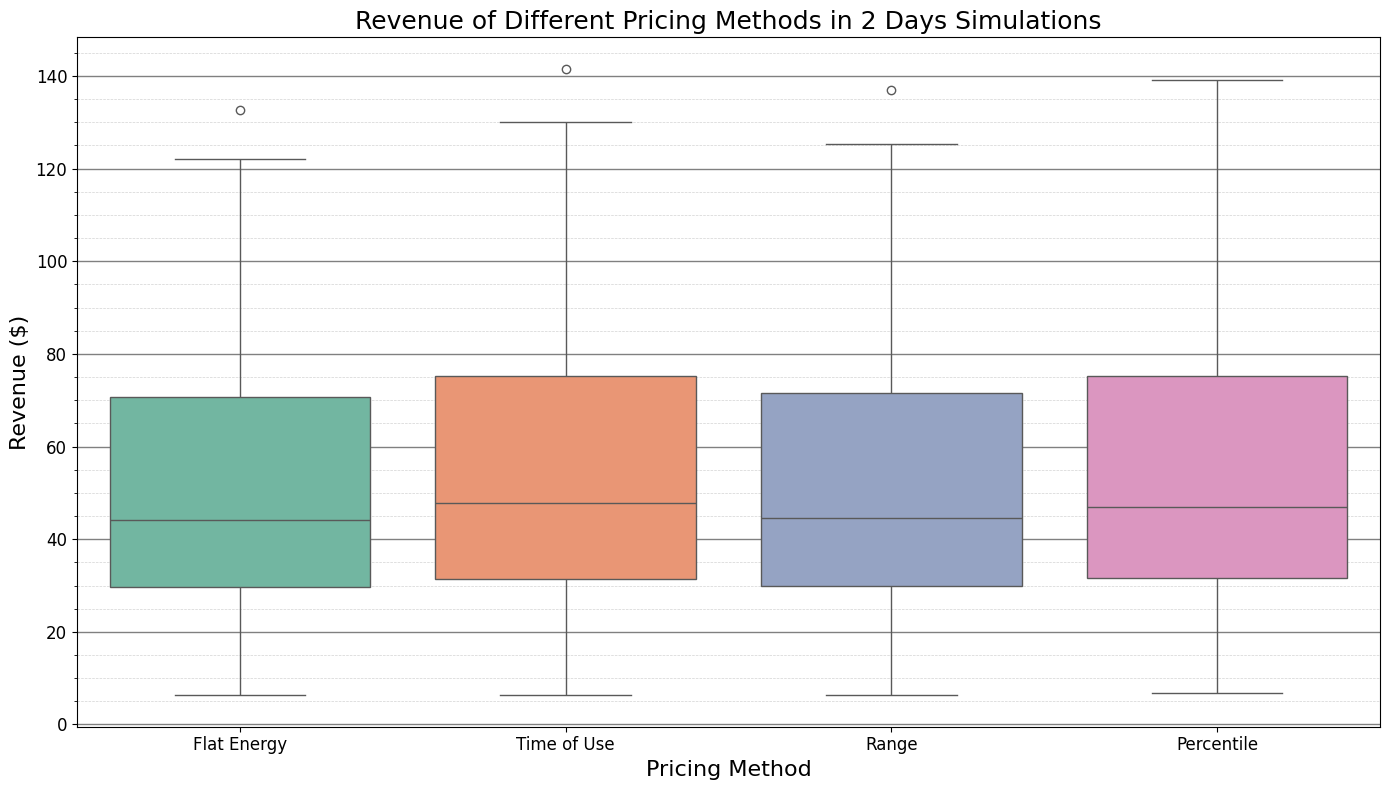

<Figure size 640x480 with 0 Axes>

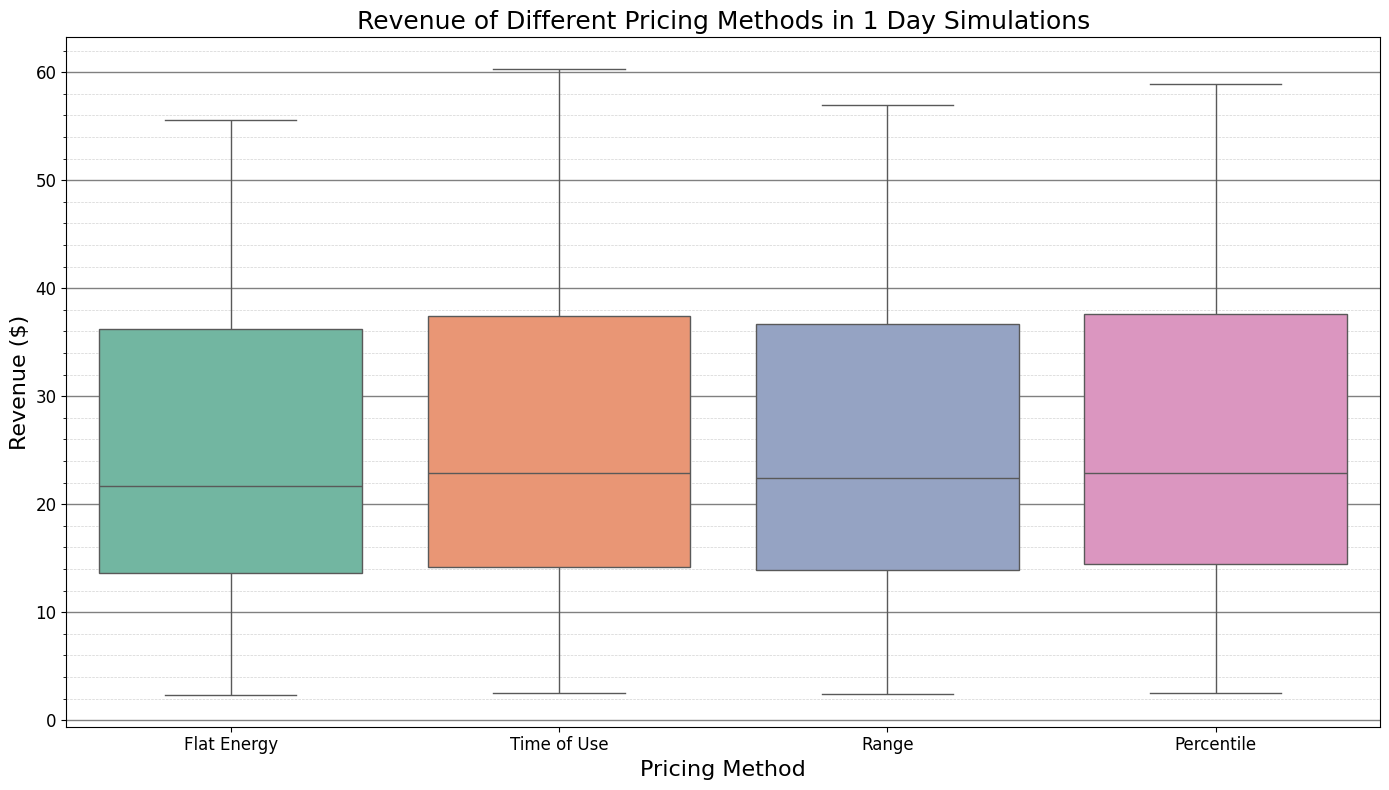

<Figure size 640x480 with 0 Axes>

In [3]:
# Retrieve the list of periods
periods = list(next(iter(all_dataframes.values())).keys())

for forecast_period in periods:
    combined_melted_df = pd.DataFrame()

    # Loop over each station's data
    for station, periods_data in all_dataframes.items():
        dataframe = periods_data[forecast_period]
        melted_df = dataframe.melt(id_vars=[dataframe.columns[0]], var_name='Batch', value_name='Revenue')
        melted_df.rename(columns={dataframe.columns[0]: 'Category'}, inplace=True) # Rename the identifier column

        combined_melted_df = pd.concat([combined_melted_df, melted_df], ignore_index=True)

    combined_melted_df = combined_melted_df[combined_melted_df['Category'] != 'Energy (kWh)']
    
    # Creating the figure and axis objects
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.set_facecolor('white')
    
    # Plotting the boxplot
    sns.boxplot(x='Category', y='Revenue', hue='Category', data=combined_melted_df, palette='Set2', ax=ax, legend=False)
    
    # Enabling minor ticks
    ax.minorticks_on()

    # Setting up grid lines
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Setting up x-axis and y-axis labels
    ax.set_xlabel('Pricing Method', fontsize=16)
    ax.set_ylabel('Revenue ($)', fontsize=16)

    # Setting the x-tick labels horizontally and ensuring they match the unique metric names
    ax.set_xticks(range(len(combined_melted_df['Category'].unique())))
    ax.set_xticklabels(combined_melted_df['Category'].unique(), rotation=0, fontsize=12)
    
    # Disable minor x-ticks
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    
    # Setting the title
    plt.title(f'Revenue of Different Pricing Methods in {forecast_period} Simulations', fontsize=18)
    
    # Adjust layout
    plt.tight_layout()

    # Check if the target directory exists
    target_dir = '../../visualisations/pricing_methods_revenue'
    if not os.path.isdir(target_dir):
        os.makedirs(target_dir)

    # Define the file name based on model and forecast period, then save the plot
    file_name = os.path.join(target_dir, f'{forecast_period.replace(" ", "_")}_revenue_simulation.png')
    plt.savefig(file_name)

    # Display the plot
    plt.show()

    # Clear the current figure to prepare for the next plot
    plt.clf()

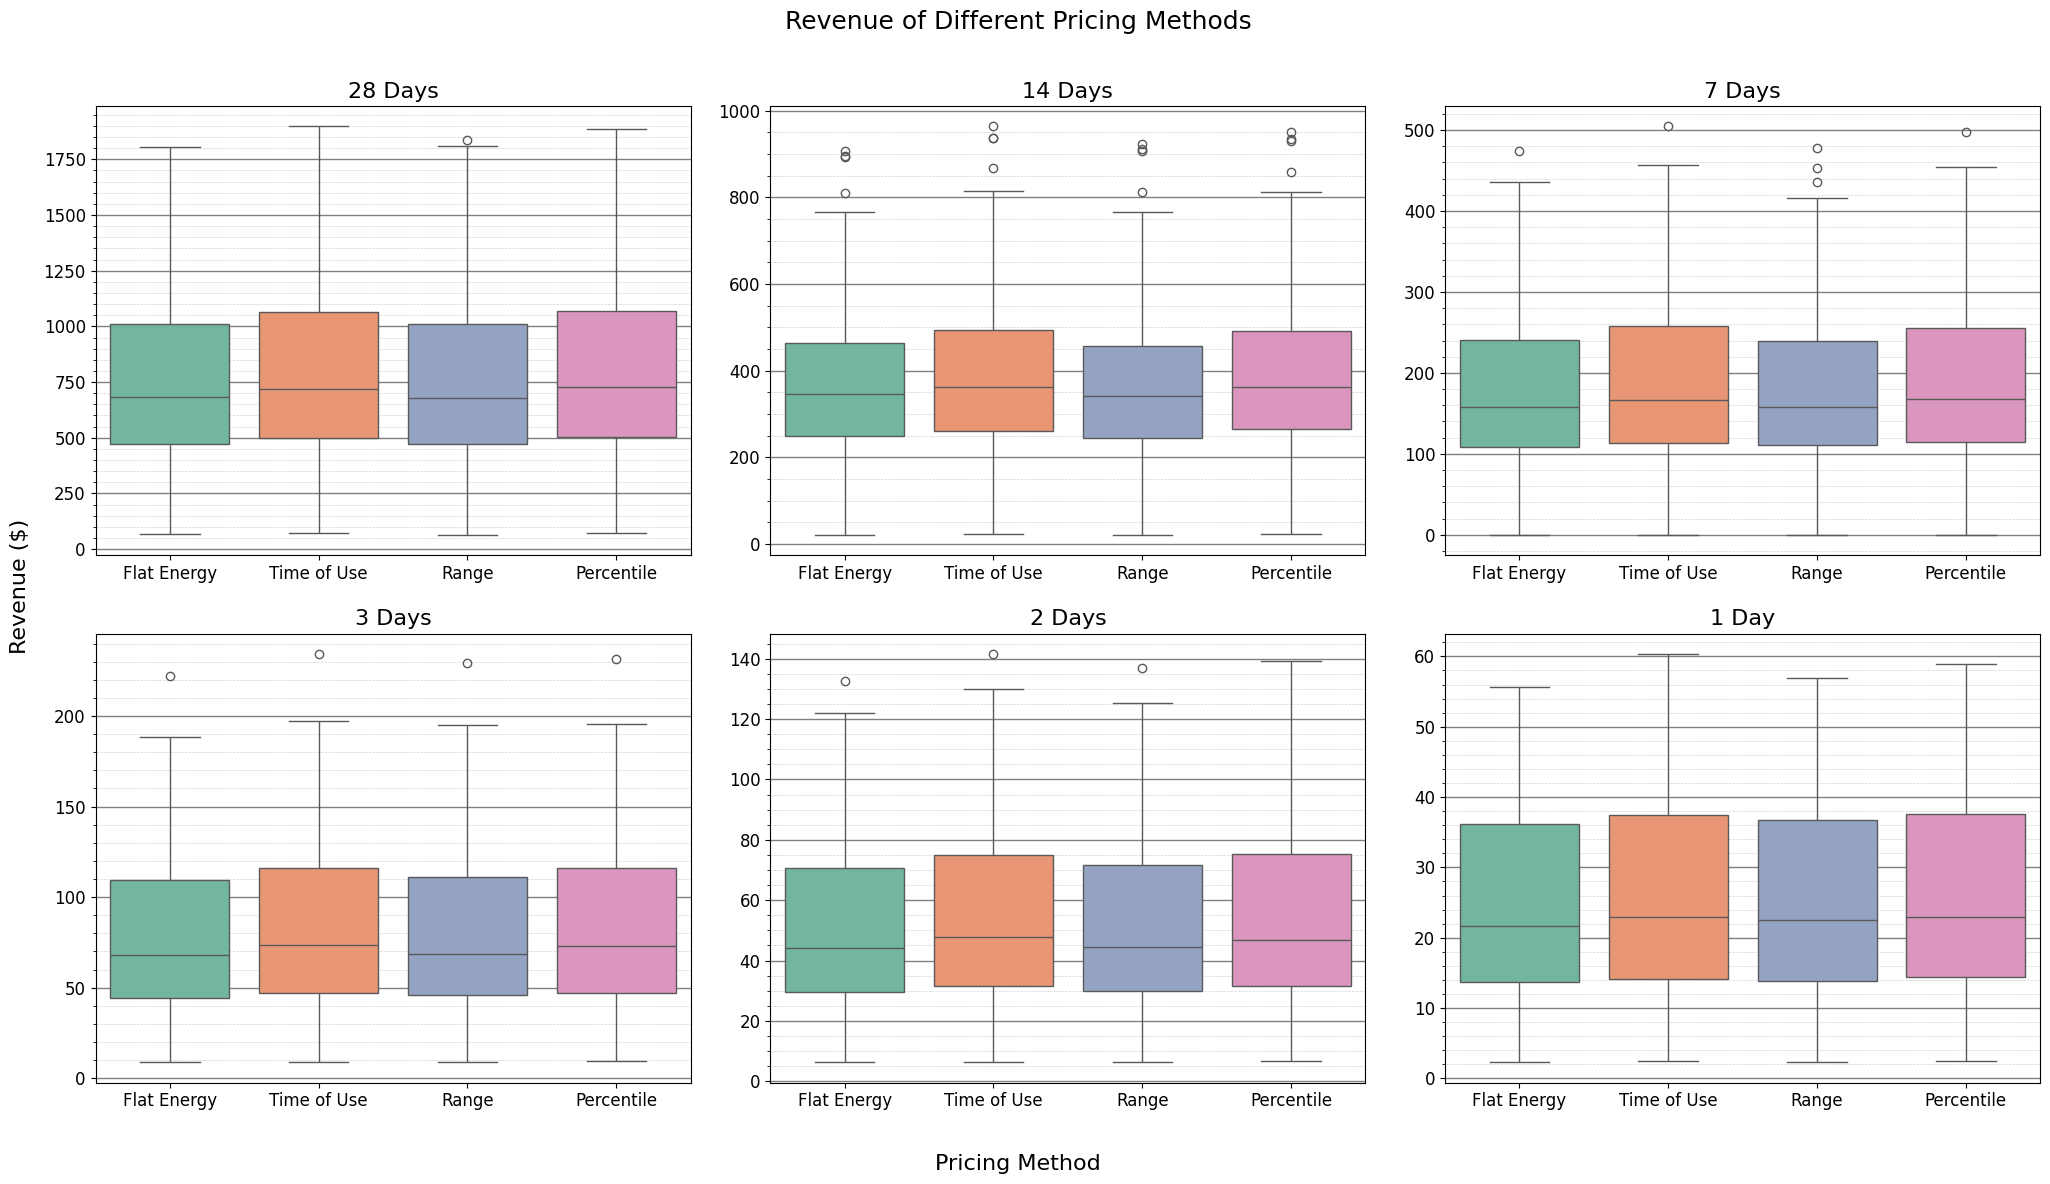

In [4]:
# Define the forecast periods based on keys in the nested dictionaries
periods = list(next(iter(all_dataframes.values())).keys())

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(14*1.5, 6*2))
axes = axes.flatten()  # Flatten the 2D numpy array to 1D for easy indexing

for i, forecast_period in enumerate(periods):
    ax = axes[i]
    combined_melted_df = pd.DataFrame()

    # Aggregate data across all stations for the current forecast period
    for station, periods_data in all_dataframes.items():
        dataframe = periods_data[forecast_period]
        melted_df = dataframe.melt(id_vars=[dataframe.columns[0]], var_name='Batch', value_name='Revenue')
        melted_df.rename(columns={dataframe.columns[0]: 'Category'}, inplace=True)
        combined_melted_df = pd.concat([combined_melted_df, melted_df], ignore_index=True)

    # Filter out unwanted categories
    combined_melted_df = combined_melted_df[combined_melted_df['Category'] != 'Energy (kWh)']

    # Plotting the boxplot for the current subplot
    sns.boxplot(x='Category', y='Revenue', hue='Category', data=combined_melted_df, palette='Set2', ax=ax, legend=False)

    # Enabling minor ticks and setting up grid lines
    ax.minorticks_on()
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.set_xticks(range(len(combined_melted_df['Category'].unique())))
    ax.set_xticklabels(combined_melted_df['Category'].unique(), rotation=0)
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Setting up title
    ax.set_title(f'{forecast_period}', fontsize=16)

    # Remove X and Y labels from all subplots
    ax.set_xlabel('')
    ax.set_ylabel('')

# Setting the subtitle and labels
fig.suptitle("Revenue of Different Pricing Methods", fontsize=18)
fig.supylabel('Revenue ($)', fontsize=16)
fig.supxlabel('Pricing Method', fontsize=16)
fig.set_facecolor('white')

# Adjust layout
plt.tight_layout(pad=2)  # Increase padding
fig.subplots_adjust(top=0.9)  

# Check if the target directory exists
target_dir = '../../visualisations/pricing_methods_revenue'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# Save the plot
file_name = os.path.join(target_dir, 'all_pricing_methods_revenue.png')
plt.savefig(file_name)

# Display the plot
plt.show()
